# Bank Churn

# Pendahuluan

Industri Perbankan merupakan salah satu industri yang sangat kompetitif. Di setiap bank, ada dua pihak yang harus diperhatikan, yaitu nasabah dan investor. Nasabah, bagaimanapun, jelas merupakan bagian terpenting dari sebuah bank. Setiap nasabah menyediakan kebutuhan dasar untuk bank yaitu simpanan dan permintaan pinjaman, yang juga aliran pendapatan dari pendapatan bunga bersih. Hingga pada akhirnya bank mendapatkan 'fee income'. Bank menyediakan layanan intermediasi antara nasabah yang memiliki dana berlebih dengan nasabah yang mengalami defisit dana. Ia meminjam dan meminjamkan dari keseluruhan dana yang tersedia untuk menjaga keseimbangan keduanya. Memahami kebutuhan nasabah mereka dan bereaksi terhadap perubahan perilaku mereka, membantu bank menghadapi persaingan yang ketat. Peningkatan hubungan dengan pelanggan yang sudah ada merupakan hal yang sangat penting bagi bank, karena menarik pelanggan baru diketahui lebih mahal. Berdasarkan penelitian dari Athanassopoulos (2000), Kehilangan nasabah dan mendatangkan nasabah baru, memiliki efek lima sampai enam kali lebih mahal daripada mempertahankan (retensi) pelanggan.
'Customer churn' adalah istilah yang digunakan di sektor perbankan yang mencoba untuk menunjukkan pergerakan pelanggan dari satu bank ke bank lain. Dalam industri perbankan, mengidentifikasi kemungkinan pelanggan churn semakin penting. Dalam domain perbankan, kami mendefinisikan 'customer churn' sebagai seseorang yang menutup semua akunnya dan berhenti berbisnis dengan bank. Ada banyak alasan bagi pelanggan untuk menutup akunnya.



# Rumusan Masalah

- Terdapat sejumlah nasabah meninggalkan bank diantara Top 5 Leading Banks in Europe* (France, Germany and Spain).
- Memprediksi nasabah mana yang meninggalkan bank atau tidak sehingga bank dapat mengambil tindakan untuk mempertahankan nasabahnya.


# Tujuan

- Fokus mentargetkan nasabah mana yang kemungkinan besar pindah atau tidak pindah ke bank lain.
- Mencari pola bagaimana mempertahankan nasabah agar tidak berpindah.


# Dataset
- Analisa dataset dari 10,000 nasabah di Tiga Negara Eropa Barat, yaitu Perancis, Jerman dan Spanyol.

**Source**
> https://www.statista.com/statistics/936590/leading-countries-in-europe-by-number-of-large-banks/

# Penjelasan Features

- CustomerId : contains random values, Id customer
- Surname : Customers surname
- CreditScore : Credit score per customer. A persons credit score is a number between 300 and 850, 850 being the highest credit rating possible
- Geography : a customer’s location. In this dataset: France, Germany, and Spain
- Gender : Female or Male
- Age
- Tenure : refers to the number of years that the customer has been a client of the bank. In this dataset, less than one year to 10 years
- Balance : Fund available in Bank
- NumOfProduct: Number of products that a customer has through the bank, between 1-4
- HasCrdCard : Customers who have a credit card, or not
- IsActiveMember : Whether an user is active or not
- EstimatedSalary : Estimated Salary each customer
- Exited: whether or not the customer left the bank. 1 - exited, 0 - Non exited

In [1]:
# Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sidetable as stb

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import data

df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.shape

(10000, 14)

In [5]:
bankDesc = []

for i in df.columns:
    bankDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
       round((((df[i].isna().sum()) / (len(df))) * 100), 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])
    
pd.DataFrame(data = bankDesc,
            columns=[
                'Data Features',
                'Data Type',
                'Null',
                'Null Percentage',
                'Unique',
                'Unique Sample'
            ])

,Data Features,Data Type,Null,Null Percentage,Unique,Unique Sample
0,RowNumber,int64,0,0.0,10000,"[2982, 5009]"
1,CustomerId,int64,0,0.0,10000,"[15708289, 15681206]"
2,Surname,object,0,0.0,2932,"[Denisova, Yirawala]"
3,CreditScore,int64,0,0.0,460,"[544, 676]"
4,Geography,object,0,0.0,3,"[Spain, Germany]"
5,Gender,object,0,0.0,2,"[Female, Male]"
6,Age,int64,0,0.0,70,"[62, 52]"
7,Tenure,int64,0,0.0,11,"[1, 0]"
8,Balance,float64,0,0.0,6382,"[113635.16, 111201.41]"
9,NumOfProducts,int64,0,0.0,4,"[3, 1]"


In [6]:
# Features Numerikal dan kategorikal

num_var = df._get_numeric_data().columns
cat_var= list(set(df.columns) - set(num_var))
print(num_var)
print('===')
print(cat_var)

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')
===
['Geography', 'Surname', 'Gender']


In [7]:
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], inplace = True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
# Statistik deskriptif untuk data numerik

df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
# Statistik deskriptif untuk data kategorikal (tipe data object)

df.describe(include = 'O')

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


Batas minimal gaji di Jerman, Perancis dan Spanyol adalah 900 euro
- jadi saya akan mengganti value tersebut dengan rata-rata atau mean dari dataset ini.

In [10]:
df[df['EstimatedSalary'] < 900]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
149,416,France,Male,32,0,0.00,2,0,1,878.87,0
195,807,France,Male,35,3,174790.15,1,1,1,600.36,0
393,556,Spain,Male,38,8,0.00,2,0,0,417.41,1
396,557,France,Male,33,3,54503.55,1,1,1,371.05,0
559,850,Spain,Female,70,5,0.00,1,1,1,705.18,0
925,714,Germany,Female,36,1,101609.01,2,1,1,447.73,0
932,708,Germany,Female,42,8,192390.52,2,1,0,823.36,0
982,668,France,Male,32,7,0.00,2,1,1,777.37,0
1139,727,Spain,Female,57,1,109679.72,1,0,1,753.37,0
1451,551,France,Female,38,10,0.00,2,1,1,216.27,0


In [11]:
value = [11.58, 90.07, 91.75, 96.27, 
         142.81, 178.19, 106.67, 123.07, 143.34,
        216.27, 236.45, 247.36, 287.99, 
        371.05, 343.38, 332.81,
        417.41, 447.73, 440.20, 428.23, 479.54,487.30, 468.94,
        582.53, 598.80, 548.52, 523.00, 502.70, 582.59, 555.28, 
        600.36, 676.06, 653.58, 667.66, 683.37, 690.84, 645.61, 
        705.18, 777.37, 753.37, 735.79, 738.88, 747.88, 706.50, 
        878.87, 823.36, 820.46, 807.06, 823.96, 861.40, 824.00, 898.51,
        ]
mean = df['EstimatedSalary'].mean()
df['EstimatedSalary'].replace([value], mean, inplace=True)

In [12]:
df[df['EstimatedSalary'] < 900]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [14]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100608.048938,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57058.044224,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,933.380000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,52099.680000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [16]:
df_clean = df.copy()
df_clean.to_csv('bank_churn_clean.csv', index = False)

# Exploratory Data Analysis

In [17]:
df_clean.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
df_clean.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100608.048938,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57058.044224,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,933.380000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,52099.680000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Dari deskripsi diatas, diketahui :
- Credit score rata-rata nasabah 650 dengan range skor kredit antara 350 hingga 850.
- Rata-rata umur nasabah 39 tahun, dengan umur termuda 18 tahun dan tertua 92 tahun.
- Mayoritas nasabah sudah menjadi nasabah selama 5 tahun.
- Balance di bank rata-rata sebanyak 76,486 euro.
- Nasabah menggunakan setidaknya 1 produk yang ditawarkan oleh bank.

In [19]:
# Statistik deskriptif untuk data kategorikal (tipe data object)

df_clean.describe(include = 'O')

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


Dari data deskripsi untuk tipe data objek,
- Kebanyakan nasabah berasal dari negara Perancis
- Jenis kelamin nasabah mayoritas Laki-laki.

In [21]:
df_clean.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Univariat

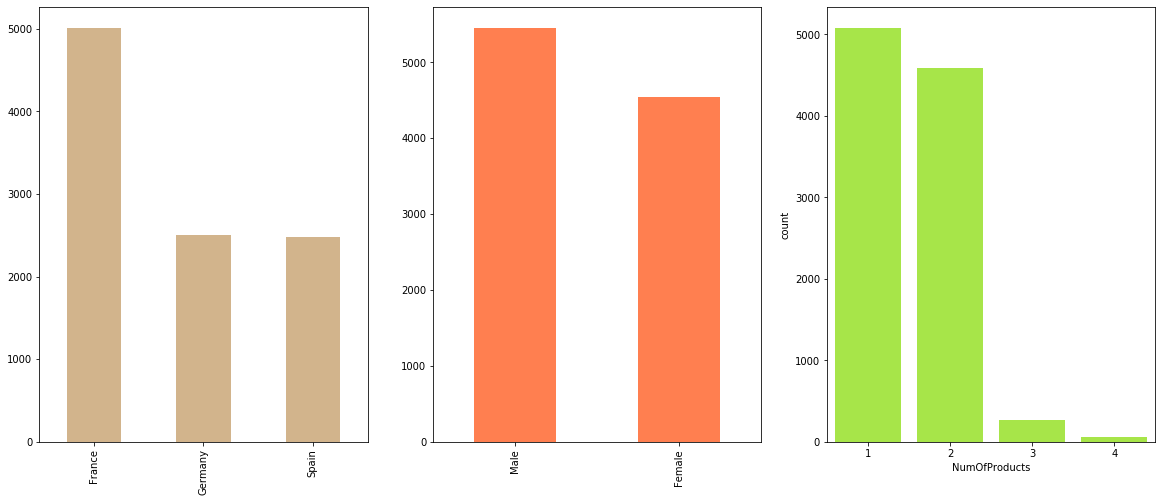

In [45]:
# Geography, Gender, NumOfProducts

f = plt.figure(figsize=(20,8))
f.add_subplot(1,3,1)
df_clean['Geography'].value_counts().plot(kind='bar', color='tan')
f.add_subplot(1,3,2)
df_clean['Gender'].value_counts().plot(kind='bar', color='coral')
f.add_subplot(1,3,3)
sns.countplot(df_clean['NumOfProducts'], color='greenyellow')


Hasil :

- Melihat pengaruh jenis kelamin sebagai variabel demografis pelanggan. Hasil penelitian ini sejalan dengan penelitian Buckinx dan Van den Poel (2005) dan Clemes et al. (2010) yang membuat daftar variabel demografis terkait pelanggan (misalnya, pendapatan, usia, pendidikan, budaya, dan kewarganegaraan)

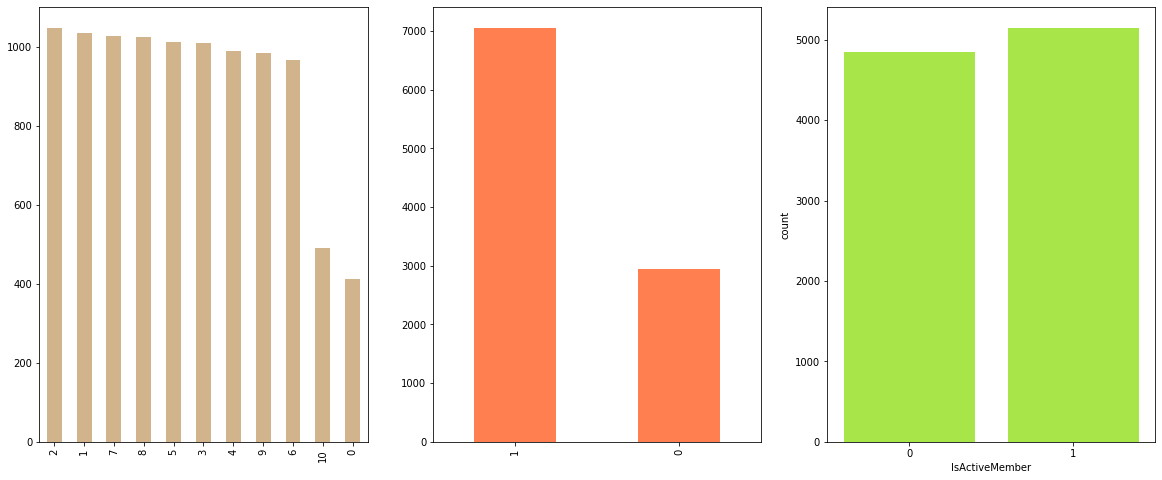

In [46]:
# Tenure, HasCrCard, IsActiveMember

f = plt.figure(figsize=(20,8))
f.add_subplot(1,3,1)
df_clean['Tenure'].value_counts().plot(kind='bar', color='tan')
f.add_subplot(1,3,2)
df_clean['HasCrCard'].value_counts().plot(kind='bar', color='coral')
f.add_subplot(1,3,3)
sns.countplot(df_clean['IsActiveMember'], color='greenyellow')

Hasil :
- Nasabah yang telah lama bergabung dan memiliki hubungan erat dengan bank lebih mungkin untuk tidak berpindah ke bank lain. Hal ini sesuai dengan hasil penelitian dari Shirazi, F., & Mohammadi, M. (2018)


-- Source :
Shirazi, F., & Mohammadi, M. (2018). A big data analytics model for customer churn prediction in the retiree segment. International Journal of Information Management.

In [56]:
df_clean['NumOfProducts'].value_counts(normalize = True)

1    0.5084
2    0.4590
3    0.0266
4    0.0060
Name: NumOfProducts, dtype: float64

Hasil :
Lebih dari 95% nasabah memiliki 1-2 produk yang ditawarkan oleh bank

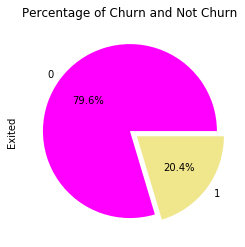

In [47]:
# Exited

count = df_clean['Exited'].value_counts()
count.plot.pie(autopct = '%1.1f%%',colors=['magenta','khaki'], figsize = (4,4),explode = [0,0.1],title = "Percentage of Churn and Not Churn")
plt.show()

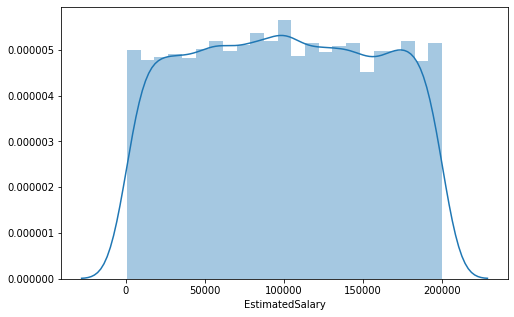

In [48]:
# Estimate Salary

plt.figure(figsize = (8,5))
sns.distplot(df_clean.EstimatedSalary)
plt.show()

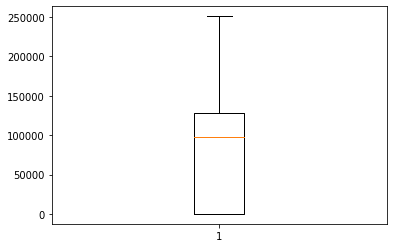

In [49]:
# Balance

plt.boxplot(df_clean['Balance'])
plt.show()

# Analisa Multivariat ( Two Features )

In [70]:
# Exited dan Rata-rata Balance

df_clean.groupby('Exited')['Balance'].mean()

Exited
0    72745.296779
1    91108.539337
Name: Balance, dtype: float64

Hasil :
- Rata-rata saldo untuk nasabah churn lebih tinggi dari rata-rata saldo nasabah yang retained

In [69]:
# Grouping beberapa features

# Credit Score
df_clean["CreditScore_group"] = pd.cut(df_clean.CreditScore, bins=[349, 579, 669, 739, 799, 850],
                                 labels = ['Poor Credit Score','Fair','Good', "Very Good", 'Exceptional'])

# Age
df_clean["Age_group"] = pd.cut(df_clean.Age, bins=[18,30,40,50,60,100], 
                         labels = ['18-30', '31-40', '41-50', "51-60", '60 Plus'])

# Balance
df_clean["Balance_group"] = pd.cut(df_clean.Balance, bins=[0,50000,100000,150000,200000,260000], 
                             labels = ['0-50000', '50001-100000', '100001-150000', "150001-200000", '200000 Plus'])

# EstimatedSalary
df_clean["EstimatedSalary_group"] = pd.cut(df_clean.EstimatedSalary, bins=[0,50000,100000,150000,200000], 
                                     labels = ['0-50000', '50001-100000', '100001-150000', "150000 Plus"])

Saya melakukan grouping Credit Score berdasarkan standar dari FICO
> source : FICO https://www.investopedia.com/terms/f/ficoscore.asp

In [72]:
# Grup CreditScore dan Exited

df_clean.groupby('CreditScore_group')['Exited'].mean()

CreditScore_group
Poor Credit Score    0.220152
Fair                 0.205644
Good                 0.186161
Very Good            0.205882
Exceptional          0.195420
Name: Exited, dtype: float64

Hasil :
- Nasabah dengan poor skor kredit memiliki tingkat churn paling tinggi (22%)

In [77]:
# Usia dan Exited

df_clean.groupby('Age')['Exited'].count().sort_values(ascending = False).head()/len(df_clean.index)

Age
37    0.0478
38    0.0477
35    0.0474
36    0.0456
34    0.0447
Name: Exited, dtype: float64

Hasil :
- Nasabah dengan umur 30 tahunan lebih cenderung churn.

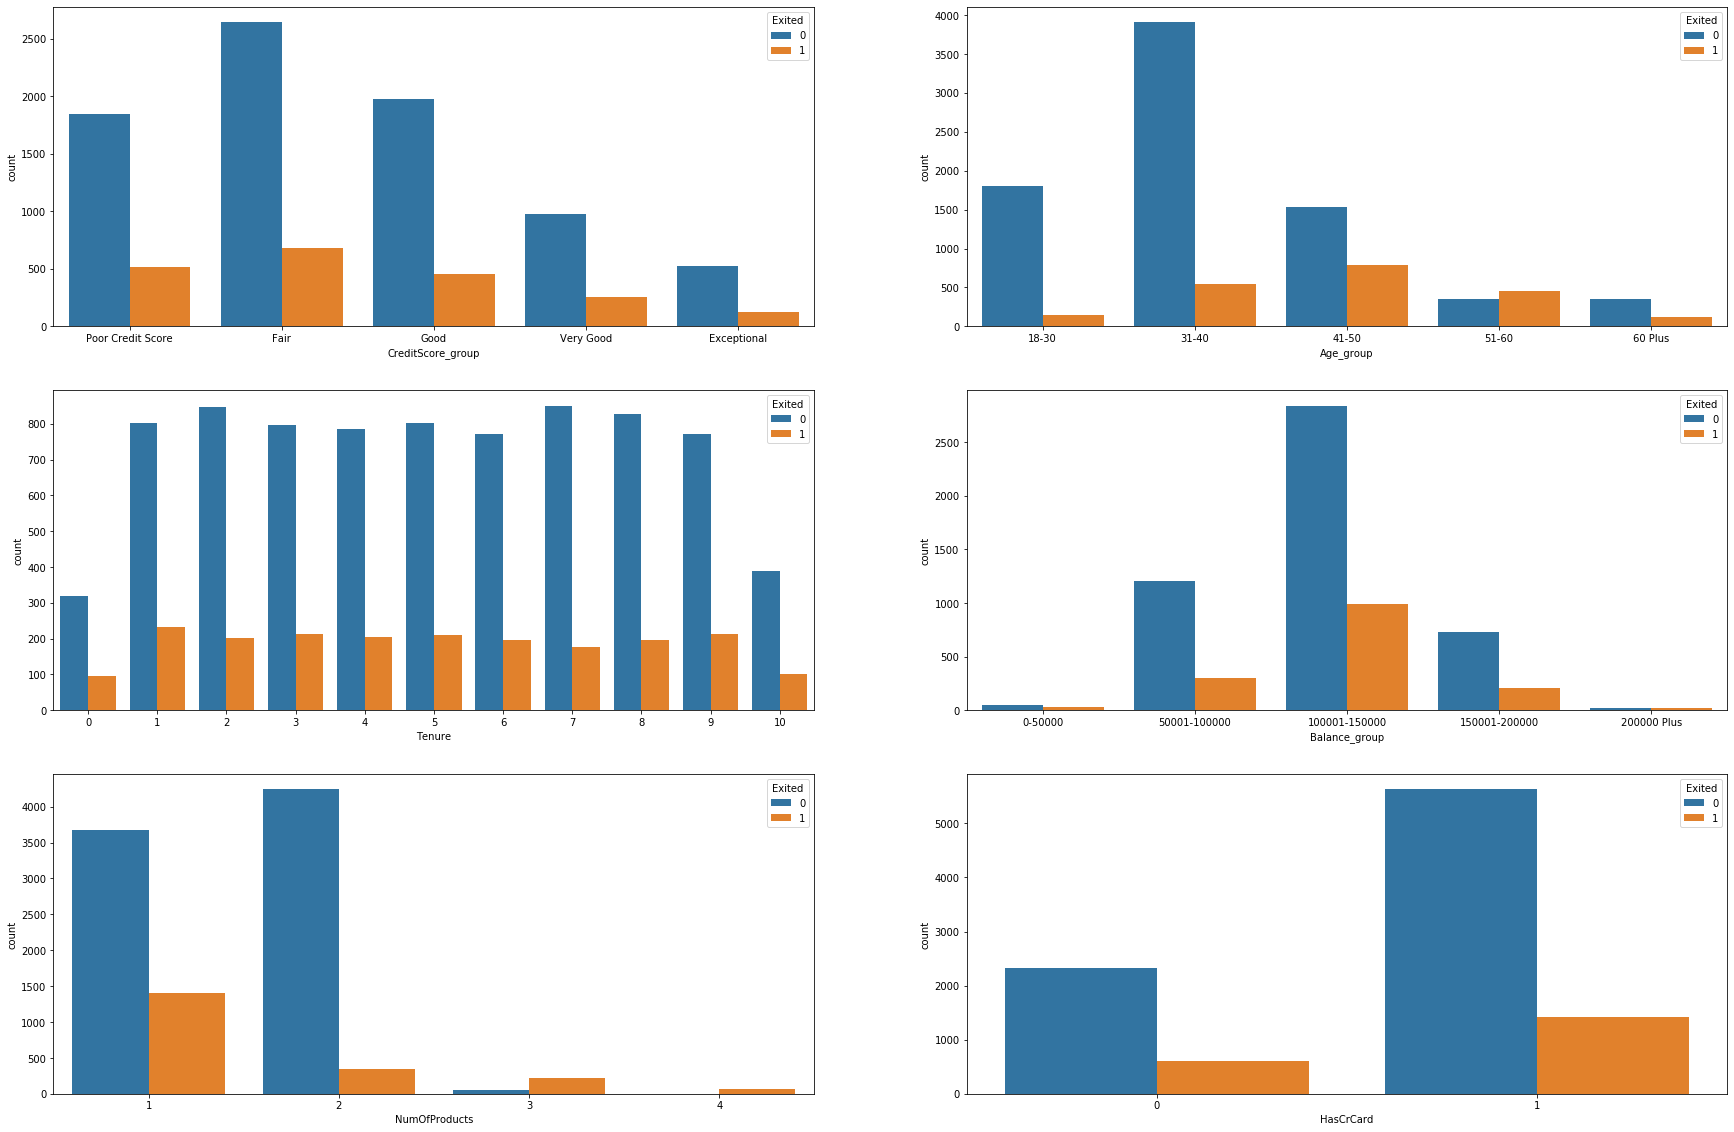

In [51]:
# Behavior of Exited customers for various categorical features
fig, axarr = plt.subplots(3,2, figsize=(30,20))
# plt.figure(figsize=(15,5))

# Credit Score
sns.countplot(x='CreditScore_group', hue = 'Exited', data = df_clean, ax=axarr[0][0])


# Age
sns.countplot(x='Age_group', hue = 'Exited', data = df_clean, ax=axarr[0][1])


# Tenure
sns.countplot(x='Tenure', hue = 'Exited', data = df_clean, ax=axarr[1][0])


# Balance
sns.countplot(x='Balance_group', hue = 'Exited', data = df_clean, ax=axarr[1][1])


# Number of Products
sns.countplot(x='NumOfProducts', hue = 'Exited', data = df_clean, ax=axarr[2][0])


# Has Credit Card
sns.countplot(x='HasCrCard', hue = 'Exited', data = df_clean, ax=axarr[2][1])


Hasil :
- Pola nasabah yang bertahan menjadi nasabah dengan yang pindah ke bank lain sama, dari banyak nasabah yang memiliki skor kredit 'Poor' ke 'Fair' mengalami kenaikan, namun selanjutnya menurun.
- Usia nasabah yang setia terbanyak berada pada rentang umur 31-40, sedangkan yang pindah bank lain terbanyak diantara umur 41-50
- Nasabah yang memiliki dana (balance) dibank sekitar 100,000 hingga 150,000 euro cenderung tidak berpindah bank.
- Jumlah produk yang digunakan nasabah paling banyak adalah satu hingga dua produk.
- Dengan menjual produk tambahan kepada nasabah, sehingga bank dapat meningkatkan loyalitas mereka (kita telah melihat bahwa nasabah yang lebih loyal adalah mereka yang menggunakan minimal dua produk bank).

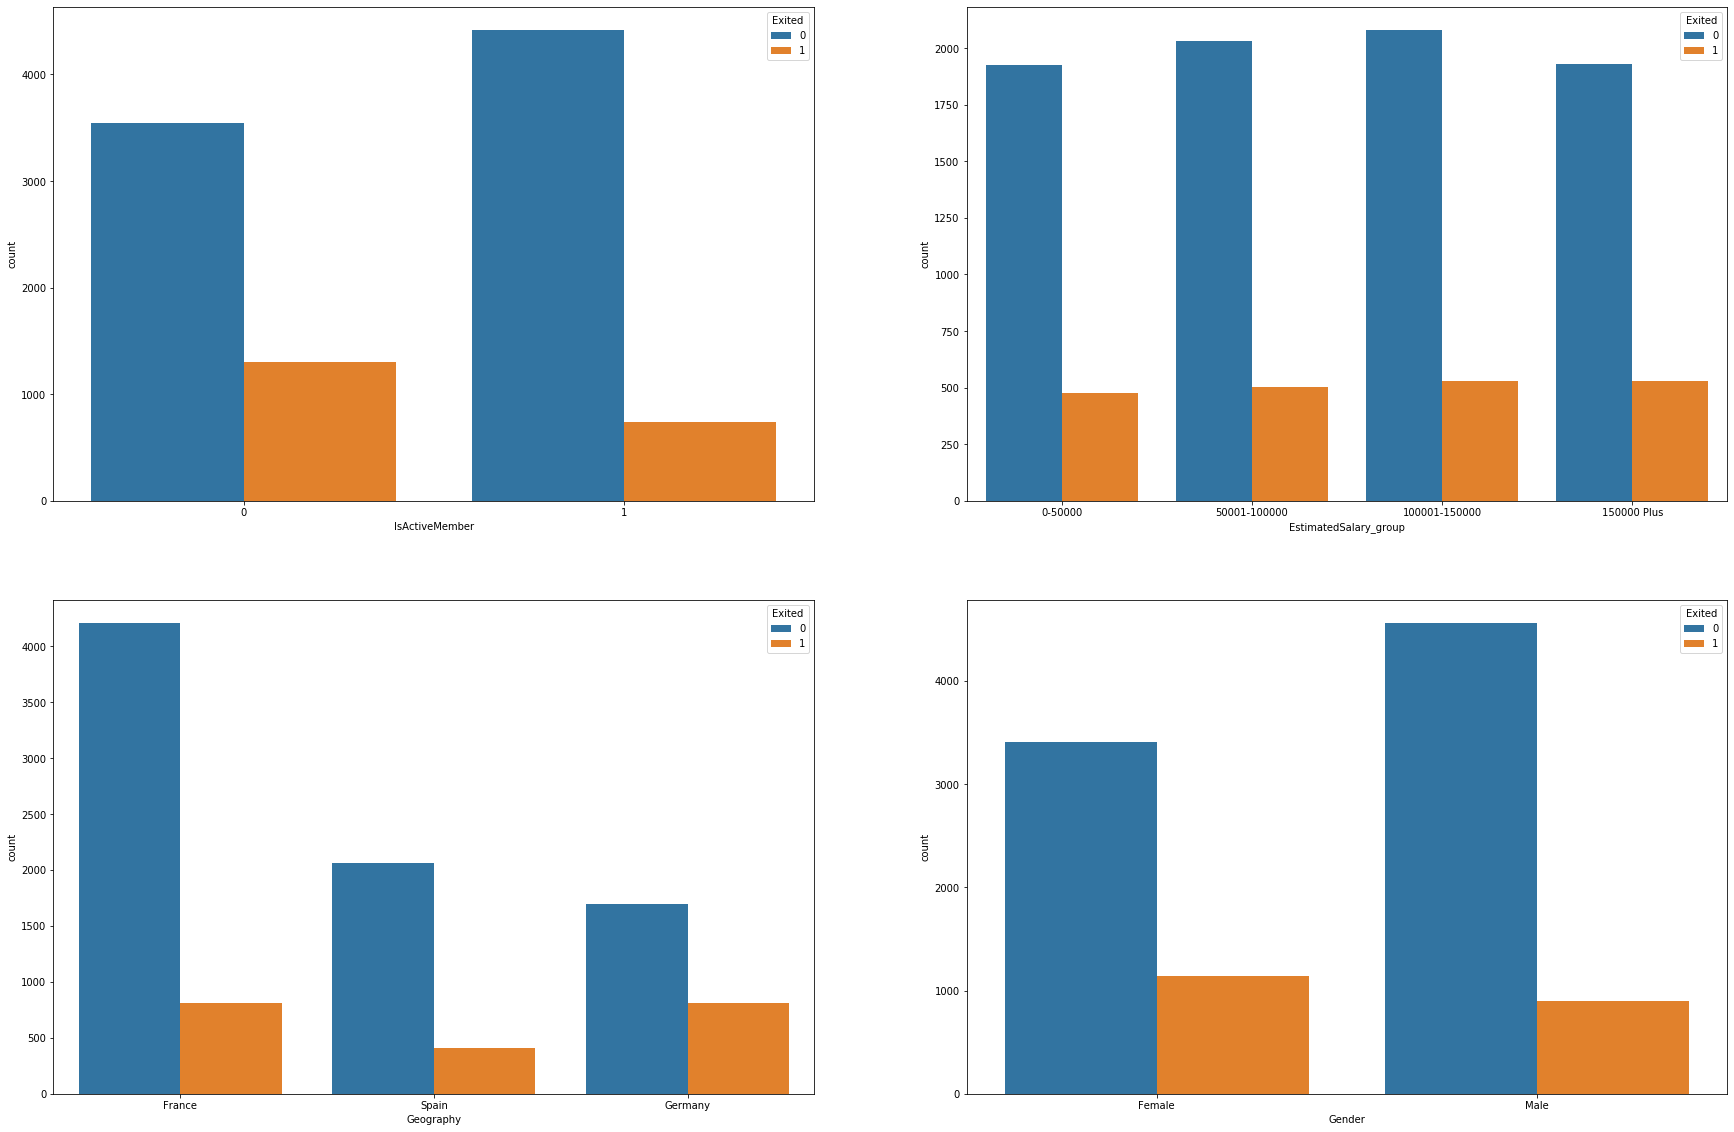

In [52]:
fig, axarr = plt.subplots(2,2, figsize=(30,20))
# plt.figure(figsize=(15,5))

# Active Member
sns.countplot(x='IsActiveMember', hue = 'Exited', data = df_clean, ax=axarr[0][0])


# EstimatedSalary
sns.countplot(x='EstimatedSalary_group', hue = 'Exited', data = df_clean, ax=axarr[0][1])


# Geography
sns.countplot(x='Geography', hue = 'Exited', data = df_clean, ax=axarr[1][0])


# Gender
sns.countplot(x='Gender', hue = 'Exited', data = df_clean, ax=axarr[1][1])

Hasil :
- Bank dapat meningkatkan pemasarannya dengan memfokuskan upaya dalam persuasi kepada nasabah agar tetap berada di bank pada klien demografis tertentu terutama nasabah wanita, kewarganegaraan Jerman dan Prancis.

In [55]:
# Gender dan Exited

pd.crosstab(df_clean['Gender'], df_clean['Exited'], normalize = True)

Exited,0,1
Gender,,
Female,0.3404,0.1139
Male,0.4559,0.0898


Hasil :
- Nasabah yang tidak aktif cenderung akan pindah ke bank lain.
- Nasabah dari negara Perancis akan setia dengan bank.
- Nasabah pria cenderung tidak akan pindah ke bank lain (46%), hal tersebut berbanding terbalik dengan nasabah wanita.
- 11,4% wanita lebih memilih pindah ke bank lain

In [66]:
# Exited dan Jumlah produk

pd.crosstab(index = df_clean['Exited'], columns = df_clean['NumOfProducts'], normalize = 'columns')

NumOfProducts,1,2,3,4
Exited,,,,
0,0.722856,0.924183,0.172932,0.0
1,0.277144,0.075817,0.827068,1.0


Hasil :
- Tingkat retensi nasabah 92% jika nasabah mempunyai 2 produk dari bank
- Jika nasabah memiliki produk yang ditawarkan bank lebih dari 2 produk, maka nasabah akan pindah ke bank lain.

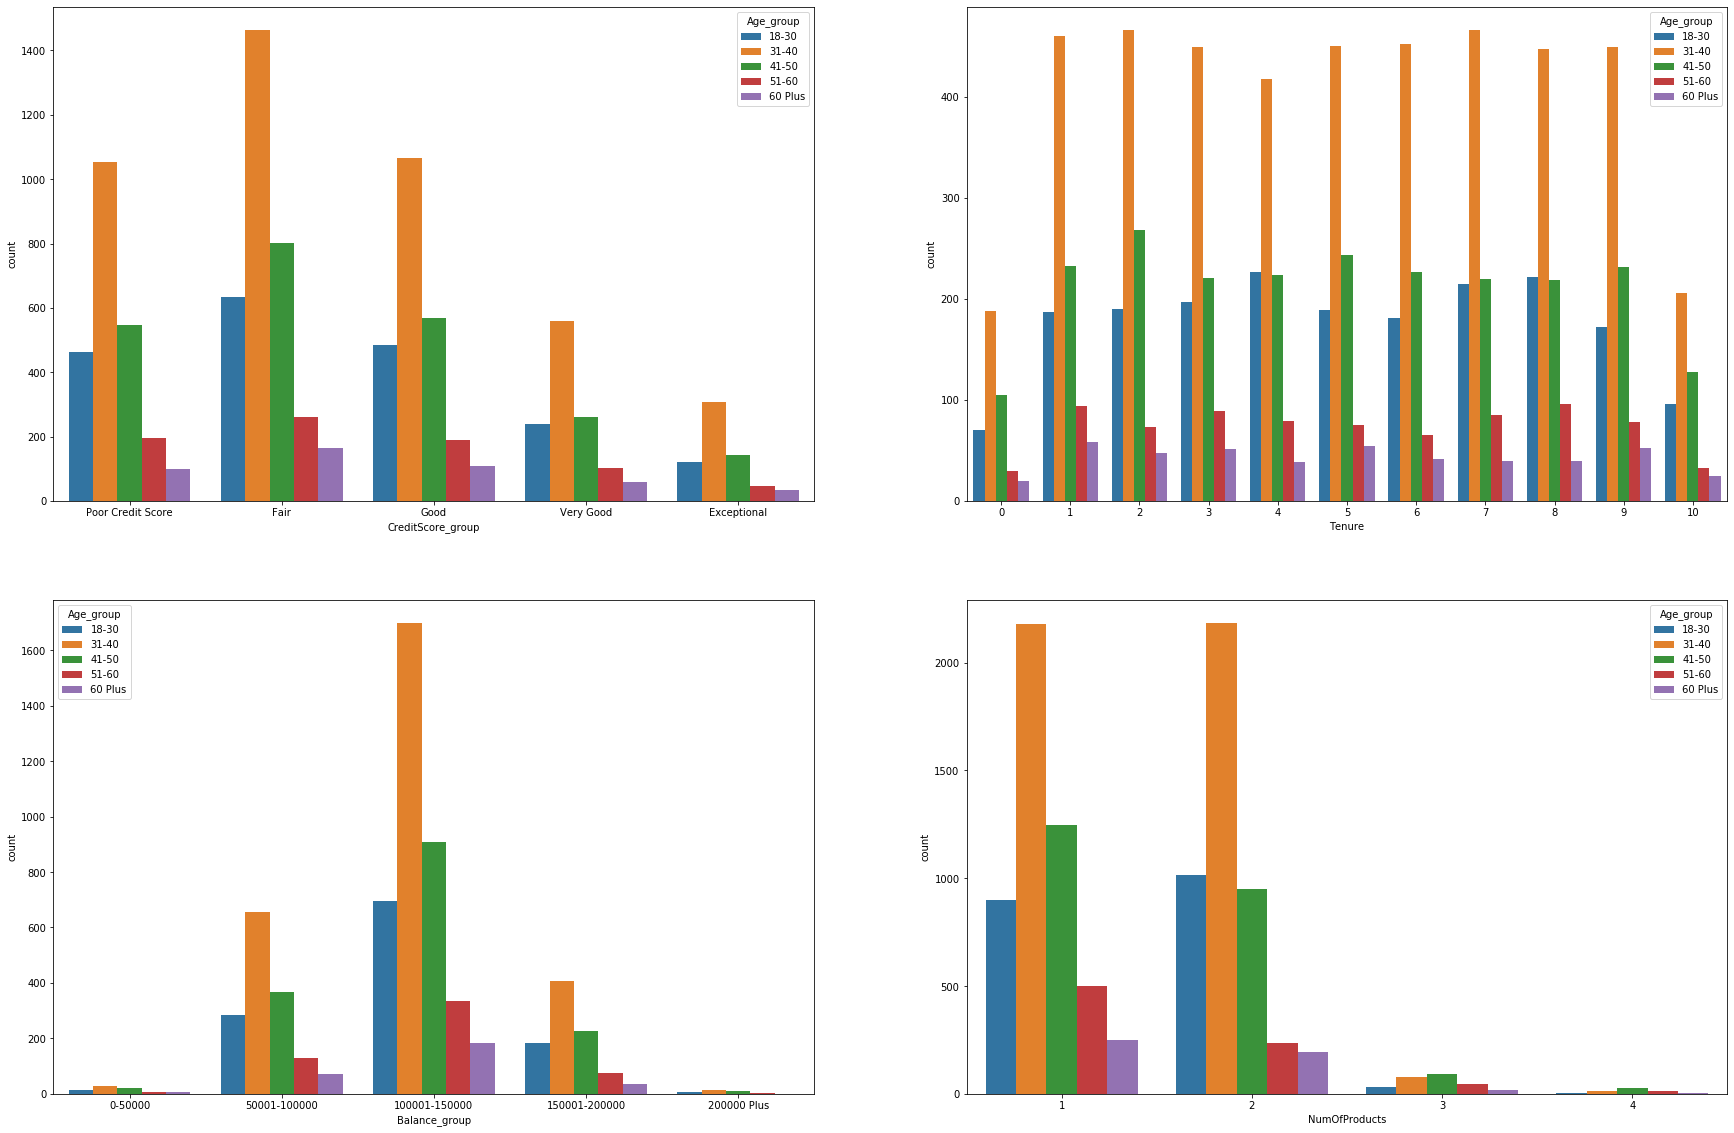

In [53]:
# Perilaku nasabah berdasarkan grup usia terhadap features lainnya

fig, axarr = plt.subplots(2,2, figsize=(30,20))
# plt.figure(figsize=(15,5))

# Credit Score
sns.countplot(x='CreditScore_group', hue = 'Age_group', data = df_clean, ax=axarr[0][0])


# Tenure
sns.countplot(x='Tenure', hue = 'Age_group', data = df_clean, ax=axarr[0][1])


# Balance
sns.countplot(x='Balance_group', hue = 'Age_group', data = df_clean, ax=axarr[1][0])


# Number of Products
sns.countplot(x='NumOfProducts', hue = 'Age_group', data = df_clean, ax=axarr[1][1])

Hasil :
- Grup usia nasabah 31-40 lebih mendominasi pada feature grup skor kredit, tenure, dan dana tersedia (balance) di bank
- Jumlah nasabah yang memiliki produk 1-2 terbanyak ada di grup usia nasabah 31-40

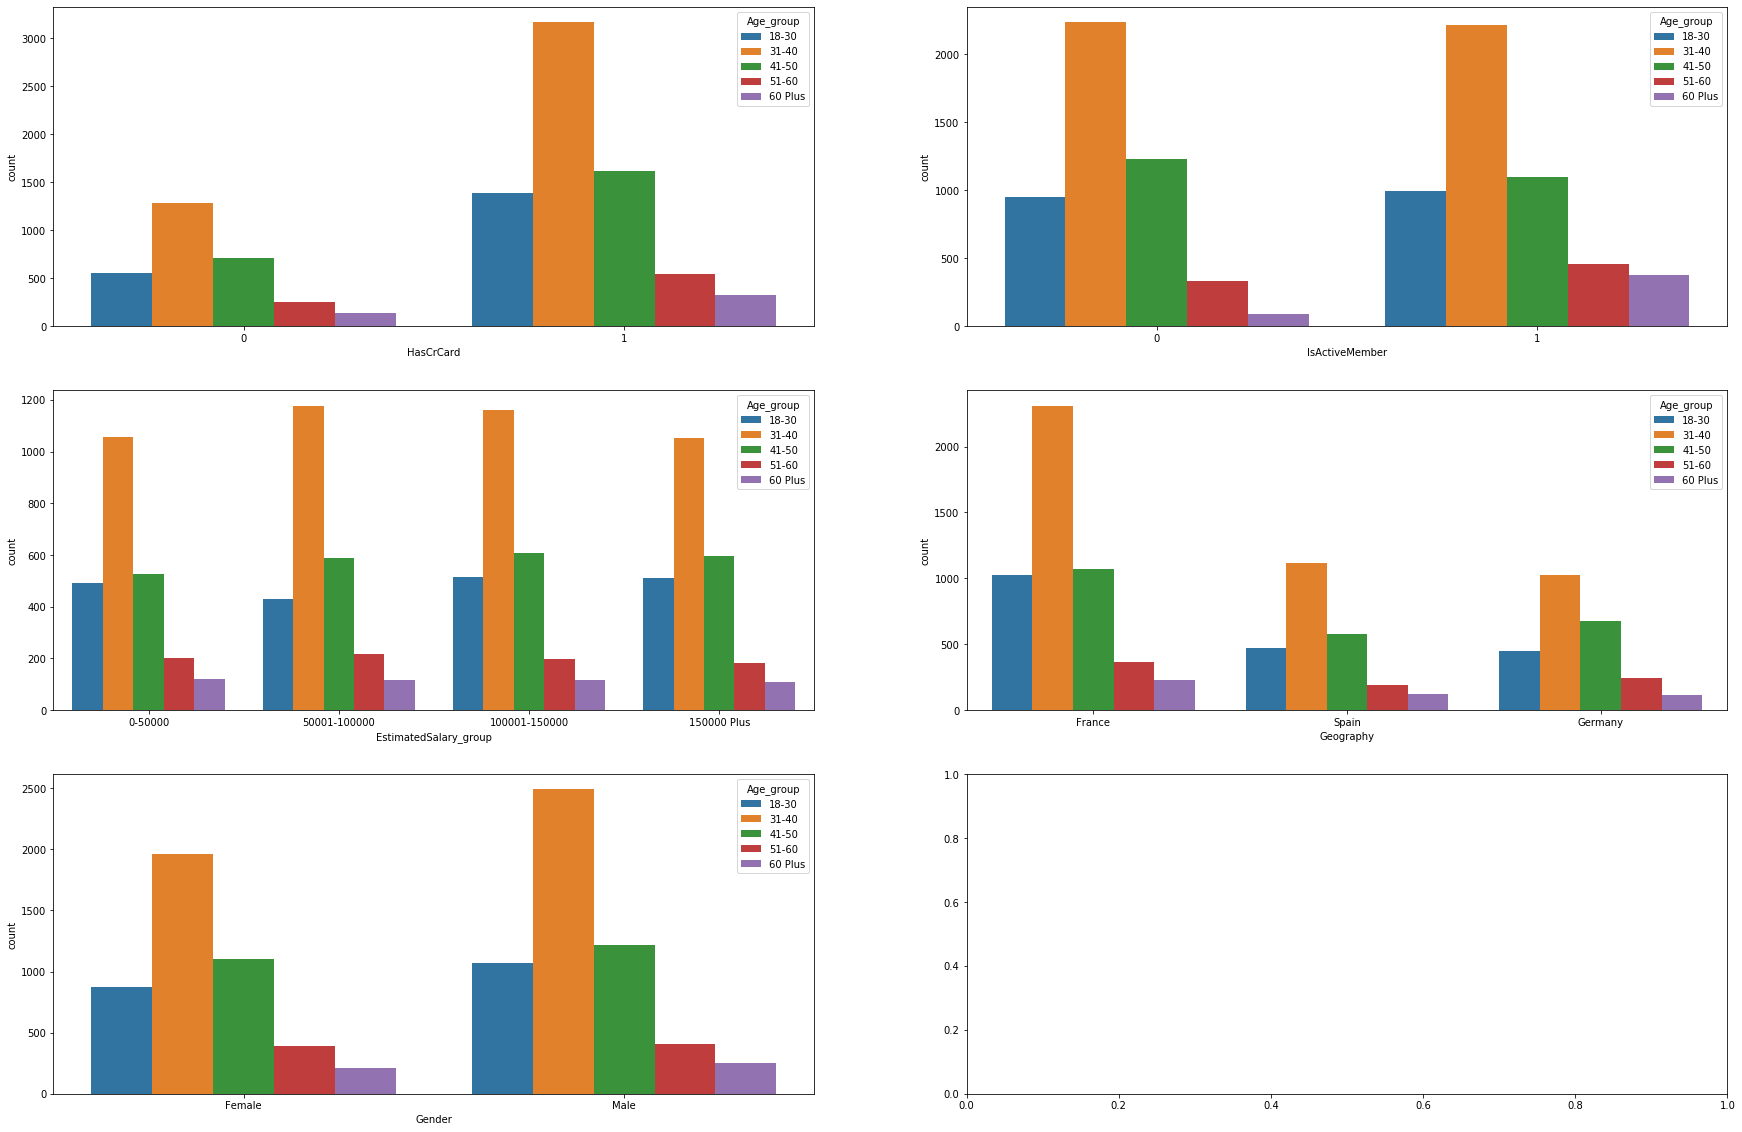

In [54]:
# Perilaku nasabah berdasarkan grup usia terhadap features lainnya (1)

fig, axarr = plt.subplots(3,2, figsize=(30,20))
# plt.figure(figsize=(15,5))


# Has Credit Card
sns.countplot(x='HasCrCard', hue = 'Age_group', data = df_clean, ax=axarr[0][0])


# Active Member
sns.countplot(x='IsActiveMember', hue = 'Age_group', data = df_clean, ax=axarr[0][1])


# EstimatedSalary
sns.countplot(x='EstimatedSalary_group', hue = 'Age_group', data = df_clean, ax=axarr[1][0])


# Geography
sns.countplot(x='Geography', hue = 'Age_group', data = df_clean, ax=axarr[1][1])


# Gender
sns.countplot(x='Gender', hue = 'Age_group', data = df_clean, ax=axarr[2][0])

Hasil :
- Lebih banyak nasabah yang memiliki kartu kredit diseluruh grup usia.
- Grup usia 31-40 tahun, nasabah berlokasi di Perancis.
- Nasabah laki-laki lebih banyak di grup usia 31-40 tahun, sedangkan wanita berumur 60 tahun keatas paling sedikit.

# Analisa Multivariat ( Three Features )

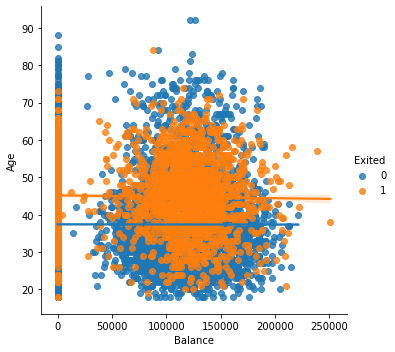

In [44]:
sns.lmplot(x = 'Balance', y = 'Age', data = df_clean, hue = 'Exited')

In [57]:
# Gender, Exited dan Grup CreditScore

pd.crosstab(index = df_clean['Gender'], columns = [df_clean['Exited'], df_clean['CreditScore_group']], normalize = 'columns').round(2)

Exited                            0                                    \
CreditScore_group Poor Credit Score  Fair  Good Very Good Exceptional   
Gender                                                                  
Female                         0.43  0.42  0.43      0.43        0.43   
Male                           0.57  0.58  0.57      0.57        0.57   

Exited                            1                                    
CreditScore_group Poor Credit Score  Fair  Good Very Good Exceptional  
Gender                                                                 
Female                         0.52  0.58  0.57      0.58        0.54  
Male                           0.48  0.42  0.43      0.42        0.46

Hasil :
- Nasabah wanita dengan skor kredit 'Fair' dan 'Very Good' memiliki persentase berpindah bank diantara seluruh grup skor kredit.
- Nasabah pria dengan skor kredit 'Fair' mempunyai tingkat persentase paling tinggi untuk tetap menggunakan layanan bank.
- Secara umum, nasabah pria memiliki persentase tertinggi untuk tidak berpindah bank dibandingkan nasabah wanita.

In [59]:
# Gender, Exited dan rata-rata usia

pd.crosstab(index = df_clean['Gender'], columns = df_clean['Exited'], values = df_clean['Age'], aggfunc = 'median')

Exited,0,1
Gender,,
Female,36,45
Male,36,45


Hasil :
- Untuk nasabah pria dan wanita median usia untuk berpindah bank adalah 45 tahun, sedangkan tetap dengan bank pada usia 36 tahun.
- Nasabah dengan umur lebih tua memiliki kecenderungan untuk berpindah bank daripada usia muda.

In [60]:
# Gender, Exited dan Geography

pd.crosstab(index = df_clean['Gender'], columns = [df_clean['Exited'], df_clean['Geography']], normalize = 'columns' )

Exited            0                             1                    
Geography    France   Germany     Spain    France   Germany     Spain
Gender                                                               
Female     0.428402  0.439528  0.415698  0.567901  0.550369  0.559322
Male       0.571598  0.560472  0.584302  0.432099  0.449631  0.440678

Hasil :
- Nasabah wanita dari negara Perancis memiliki tingkat churn paling besar.
- Nasabah Pria dari Spanyol, lebih mungkin tidak berpindah bank.

In [65]:
# Gender, Exited dan Number of Products

pd.crosstab(index = df_clean['Gender'], columns = [df_clean['Exited'], df_clean['NumOfProducts']], normalize = 'columns')

Exited                0                             1                      \
NumOfProducts         1         2         3         1         2         3   
Gender                                                                      
Female         0.417415  0.436115  0.434783  0.540809  0.603448  0.586364   
Male           0.582585  0.563885  0.565217  0.459191  0.396552  0.413636   

Exited                   
NumOfProducts         4  
Gender                   
Female         0.633333  
Male           0.366667

Hasil :
- Tidak ada nasabah yang tetap bersama dengan bank jika ia memiliki 4 produk.

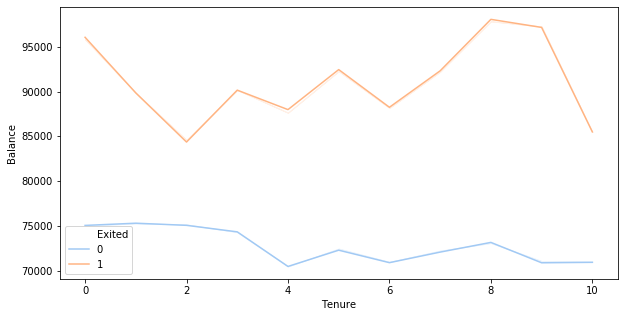

In [68]:
# Tenure, Balance dan Exited

plt.figure(figsize = (10, 5))
sns.lineplot(x = 'Tenure', y = 'Balance', hue = 'Exited', data = df_clean, palette = 'pastel', ci = False)

Hasil :
- Nasabah yang churn lebih fluktuatif bila dibandingkan dengan nasabah yang retensi.

# Kesimpulan

- Menyelidiki pengaruh jenis kelamin sebagai variabel demografis pelanggan. Hasil penelitian ini sejalan dengan penelitian Buckinx dan Van den Poel (2005) dan Clemes et al. (2010) yang membuat daftar variabel demografis terkait pelanggan (misalnya, usia, pendidikan, budaya, dan kewarganegaraan).
- Dengan menjual produk tambahan kepada nasabah yang kita kaitkan dengan mereka, sehingga meningkatkan loyalitas mereka (kita telah melihat bahwa nasabah yang lebih loyal adalah mereka yang menggunakan minimal dua produk bank).
- Klien yang memiliki masa kerja yang lebih lama dan hubungan perbankan yang lebih dalam dengan bank target cenderung tidak mengalami churn. Shirazi, F., & Mohammadi, M. (2018)

# Rekomendasi

1. Bank diharapkan tidak menawarkan produk lain kepada nasabah yang sudah memiliki 2 produk.
    - Karena apabila nasabah memiliki produk bank lebih dari 2, maka nasabah akan pindah ke bank lain.
    - Tidak ada nasabah yang tetap jika memiliki 4 produk.
2. Bank harus meningkatkan Customer Relation Management dengan nasabah.
    - Perbanyak interaksi dengan nasabah Pria, karena mereka cenderung tidak berpindah bank. 
    - Rata-rata saldo nasabah churn lebih tinggi dari rata-rata saldo nasabah yang retained.
    - Diharapkan bank tidak kehilangan nasabah penting yang memiliki jumlah saldo tinggi di bank.
    - Berikan perhatian lebih kepada nasabah yang memiliki saldo (balance) sekitar 100,000 hingga 150,000 euro (cenderung tidak berpindah bank).
3. Pentingnya menyediakan seluruh rangkaian produk keuangan sehingga nasabah dapat memenuhi semua kebutuhan finansialnya dalam satu penyedia layanan yang sama. Selain itu, pelanggan dan bank dapat membangun hubungan yang berharga melalui produk dan layanan yang memuaskan kebutuhan pelanggan dan memperkuat posisi pasar perusahaan di masa depan.
4. Bank dapat meningkatkan pemasarannya dengan memfokuskan upaya dalam persuasi agar nasabah tetap berada di bank untuk klien demografis tertentu terutama nasabah wanita, kewarganegaraan Jerman dan Prancis.
